In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


In [8]:
fake_df = pd.read_csv('C:/Users/user/Desktop/projects/Fake-News-Detection/data/datasets/Fake.csv')
true_df = pd.read_csv('C:/Users/user/Desktop/projects/Fake-News-Detection/data/datasets/True.csv')
fake_df['label']=1
true_df['label']=0
df = pd.concat([fake_df, true_df], ignore_index=True)
df = data.sample(frac=1).reset_index(drop=True)


NameError: name 'data' is not defined

In [11]:
df.head()

,title,text,subject,date,label
0,"Vocal, powerful critic of Wall Street rules le...",WASHINGTON (Reuters) - Representative Jeb Hens...,politicsNews,"October 31, 2017",0
1,Vietnam prosecutes former state rubber firm ch...,HANOI (Reuters) - A former chairman of state-r...,worldnews,"December 12, 2017",0
2,Getting North Korea to give up nuclear bomb pr...,WASHINGTON (Reuters) - The U.S. policy of tryi...,politicsNews,"October 25, 2016",0
3,MADNESS IN BERKELEY: Anarchists Clash With Tru...,THE ANTIFA ANARCHISTS ARE IN ALL BLACK:WOMAN I...,left-news,"Mar 4, 2017",1
4,"Factbox: Trump on Twitter (July 7) - Putin, Ge...",The following statements were posted to the ve...,politicsNews,"July 7, 2017",0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [15]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [29]:
data.describe()

,label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [35]:
df['text'].iloc[5]

'MADRID (Reuters) - Spain s King Felipe VI said on Tuesday he was committed to the unity of Spain as he accused Catalan leaders, who staged a banned independence referendum on Sunday, of shattering democratic principles and of dividing Catalan society. In a televised address to the nation, the king said the  irresponsible behavior  of the Catalan leaders had undermined social harmony in Catalonia.  Today Catalan society is fractured and in conflict,  he said. He said the Spanish crown was strongly committed to the Spanish constitution and to democracy and underlined his commitment as king  to the unity and permanence of Spain.  '

In [48]:
df['text'].apply(len)

0        4363
1         985
2        3517
3        1325
4        1158
         ... 
44893    1277
44894    2939
44895       1
44896     728
44897    2426
Name: text, Length: 44898, dtype: int64

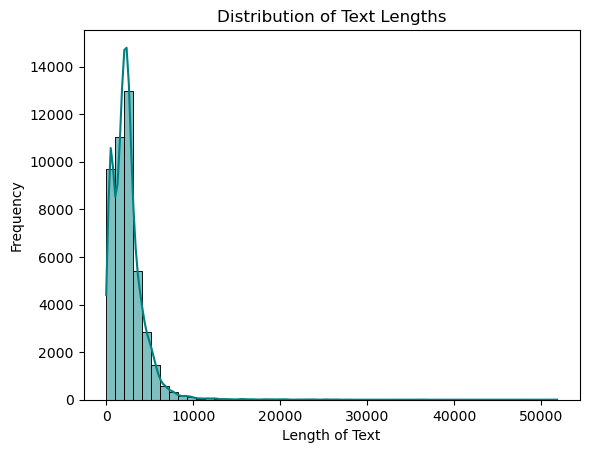

In [54]:
sns.histplot(df['text'].apply(len), bins=50, kde=True, color='teal')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

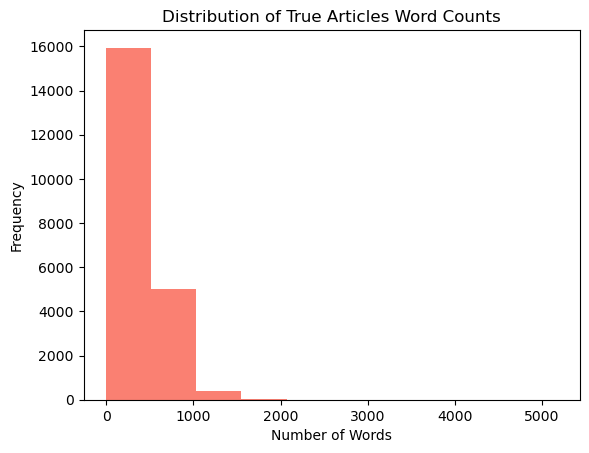

In [71]:
true_df['word_count'] = true_df['text'].apply(lambda x: len(x.split()))
plt.hist(true_df['word_count'], bins=10, color='salmon')
plt.title('Distribution of True Articles Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

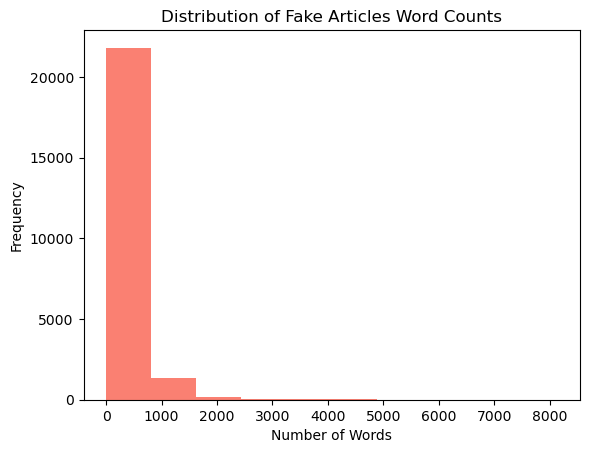

In [73]:
fake_df['word_count'] = fake_df['text'].apply(lambda x: len(x.split()))
plt.hist(fake_df['word_count'], bins=10, color='salmon')
plt.title('Distribution of Fake Articles Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

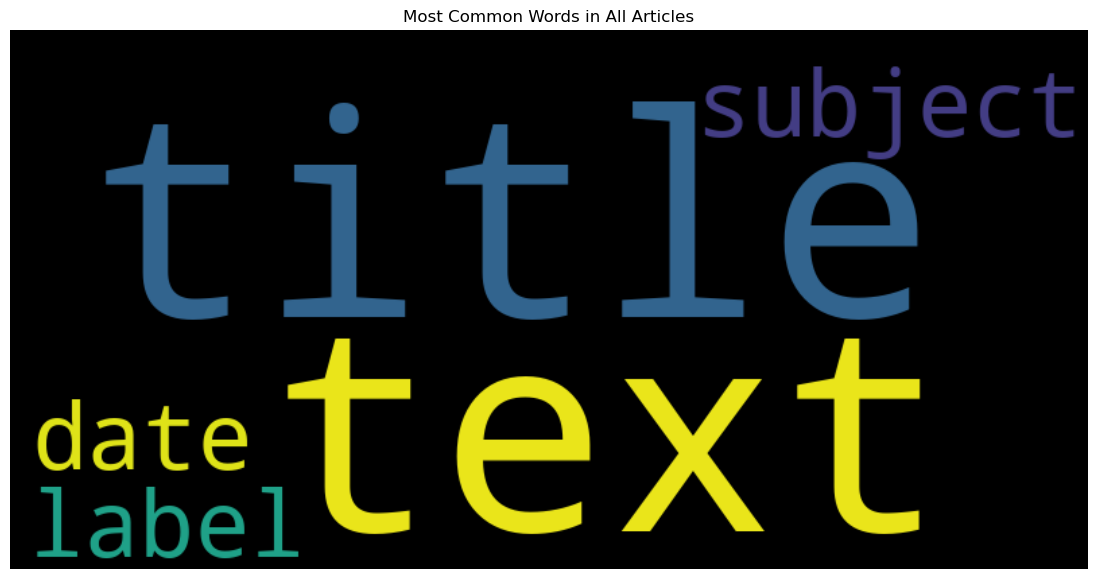

In [26]:
text = ' '.join(df)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in All Articles")
plt.show()
